In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('Dataset20_21.xlsx')
df.head()

,Player,Club,Age,Position,Nation,Value,Contract Years Left,League,Squad (20/21),MP (20/21),...,Offsides (20/21),Crosses (20/21),Interceptions (20/21),Penalty Kicks Won (20/21),Penalties Conceded (20/21),Own Goals (20/21),Total Loose Balls Recovered (20/21),Aerial Duel Won (20/21),Aerial Duel Lost (20/21),% Aerial Duels Won (20/21)
0,Kylian Mbappe,Paris Saint-Germain,22,attack,France,144000000,1,Ligue 1,Paris S-G,31.0,...,17.0,68.0,7.0,4.0,0.0,0.0,109.0,7.0,8.0,46.7
1,Erling Haaland,Borussia Dortmund,21,attack,Norway,117000000,3,Bundesliga,Dortmund,28.0,...,15.0,13.0,5.0,0.0,0.0,0.0,96.0,37.0,40.0,48.1
2,Harry Kane,Tottenham Hotspur,28,attack,England,108000000,3,Premier League,Tottenham,35.0,...,12.0,37.0,15.0,2.0,0.0,0.0,155.0,90.0,129.0,41.1
3,Jadon Sancho,Manchester United,21,attack,England,90000000,5,Premier League,Dortmund,26.0,...,9.0,52.0,14.0,0.0,0.0,0.0,154.0,5.0,22.0,18.5
4,Mohamed Salah,Liverpool FC,29,attack,Egypt,90000000,2,Premier League,Liverpool,37.0,...,13.0,47.0,9.0,2.0,0.0,0.0,191.0,21.0,52.0,28.8


In [3]:
len(df)

2075

In [4]:
df_15 = df[df['MP (20/21)'] > 15]
df_15.head()

,Player,Club,Age,Position,Nation,Value,Contract Years Left,League,Squad (20/21),MP (20/21),...,Offsides (20/21),Crosses (20/21),Interceptions (20/21),Penalty Kicks Won (20/21),Penalties Conceded (20/21),Own Goals (20/21),Total Loose Balls Recovered (20/21),Aerial Duel Won (20/21),Aerial Duel Lost (20/21),% Aerial Duels Won (20/21)
0,Kylian Mbappe,Paris Saint-Germain,22,attack,France,144000000,1,Ligue 1,Paris S-G,31.0,...,17.0,68.0,7.0,4.0,0.0,0.0,109.0,7.0,8.0,46.7
1,Erling Haaland,Borussia Dortmund,21,attack,Norway,117000000,3,Bundesliga,Dortmund,28.0,...,15.0,13.0,5.0,0.0,0.0,0.0,96.0,37.0,40.0,48.1
2,Harry Kane,Tottenham Hotspur,28,attack,England,108000000,3,Premier League,Tottenham,35.0,...,12.0,37.0,15.0,2.0,0.0,0.0,155.0,90.0,129.0,41.1
3,Jadon Sancho,Manchester United,21,attack,England,90000000,5,Premier League,Dortmund,26.0,...,9.0,52.0,14.0,0.0,0.0,0.0,154.0,5.0,22.0,18.5
4,Mohamed Salah,Liverpool FC,29,attack,Egypt,90000000,2,Premier League,Liverpool,37.0,...,13.0,47.0,9.0,2.0,0.0,0.0,191.0,21.0,52.0,28.8


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

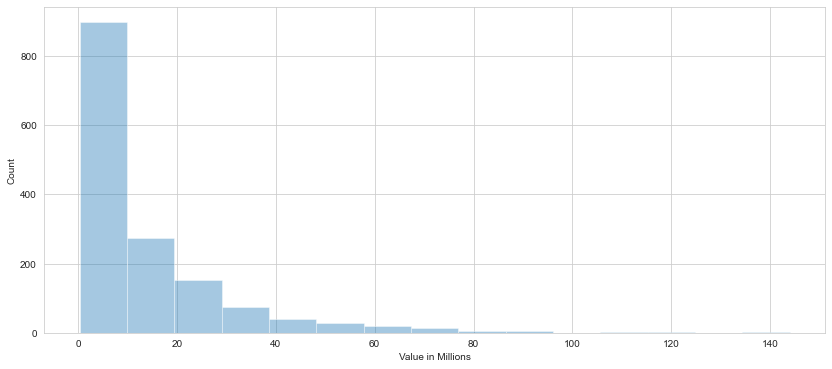

In [5]:
# Graph - distribution of transfer prices in the dataset
sns.set_style("whitegrid")
plt.figure(figsize=(14,6))
sns.distplot(df_15['Value'].mul(0.000001), bins=15, kde=False) #distribution of transfer values in dataset
plt.xlabel("Value in Millions")
plt.ylabel("Count")

In [6]:
df_15['Value'].isnull().sum() #Checking whether transfer value col has any missing values - no it does not
df_15['Age'].isnull().sum() #Checking whether age col has any missing values - no it does not

0

In [7]:
df_15['Age'].value_counts() #Checking distribution of ages - it's dominated by players in the 24-30 age bracket

24    145
26    134
27    129
28    126
25    126
29    121
23    115
30    107
31     86
22     83
21     66
32     60
33     57
34     53
20     27
19     18
35     18
36     14
18     11
37      7
38      5
39      3
40      1
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Avg Value in Millions'>

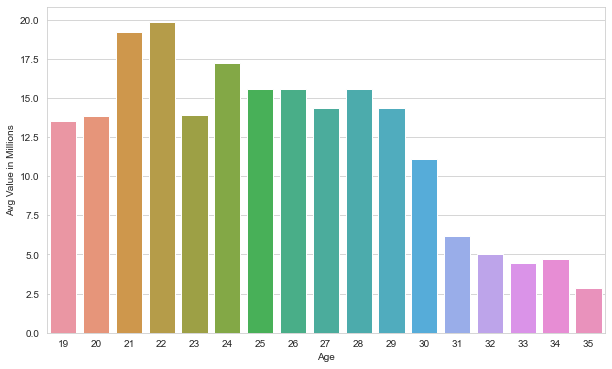

In [8]:
#Graph - correlation between age and value

#Creating new df where sample size of age values is > 15 (otherwise it's leading to a skew - see distribution in above)
counts = df_15['Age'].value_counts()
tempdf = df_15[~df_15['Age'].isin(counts[counts < 15].index)]

#New df with average values per age
tempdf = tempdf.groupby('Age')['Value'].mean()

#New df for graph
tempdf = tempdf.mul(0.000001).rename('Avg Value in Millions').reset_index() #to get value in millions

#Graph plotting
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='Age', y='Avg Value in Millions', data=tempdf)

In [9]:
#Correlation between playing position and transfer value

df_15['Position'].value_counts()

Defender      516
midfield      465
attack        432
Goalkeeper     99
Name: Position, dtype: int64

<AxesSubplot:xlabel='Position', ylabel='Avg Value in Millions'>

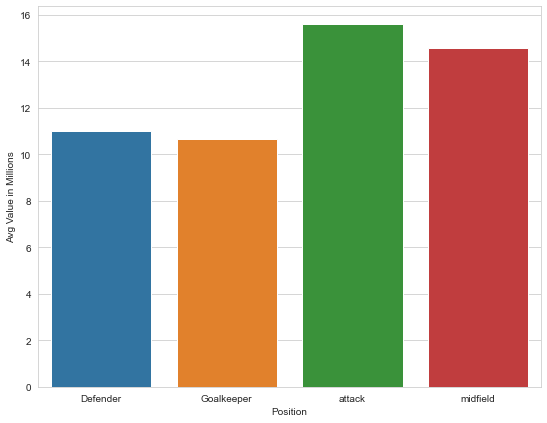

In [10]:
#New df with average values per position
tempdf = df_15.groupby('Position')['Value'].mean()

#New df for graph
tempdf = tempdf.mul(0.000001).rename('Avg Value in Millions').reset_index() #to get value in millions

#Graph plotting
sns.set_style("whitegrid")
plt.figure(figsize=(9,7))
sns.barplot(x='Position', y='Avg Value in Millions', data=tempdf)

In [12]:
#Correlation between league and transfer value

df_15['League'].value_counts()

Serie A           324
La Liga           322
Premier League    321
Ligue 1           280
Bundesliga        265
Name: League, dtype: int64

<AxesSubplot:xlabel='League', ylabel='Avg Value in Millions'>

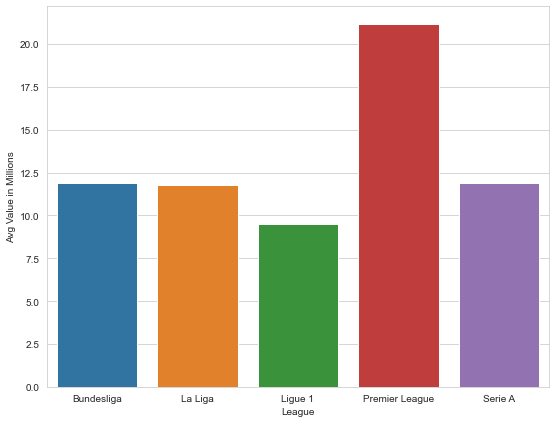

In [13]:
#New df with average values per league
tempdf = df_15.groupby('League')['Value'].mean()

#New df for graph
tempdf = tempdf.mul(0.000001).rename('Avg Value in Millions').reset_index() #to get value in millions

#Graph plotting
sns.set_style("whitegrid")
plt.figure(figsize=(9,7))
sns.barplot(x='League', y='Avg Value in Millions', data=tempdf)

In [15]:
#Correlation between contract years remaining and transfer value

df_15['Contract Years Left'].value_counts()

2       423
3       386
1       376
4       208
5        74
fail     30
6        12
0         1
7         1
10        1
Name: Contract Years Left, dtype: int64

<AxesSubplot:xlabel='Contract Years Left', ylabel='Avg Value in Millions'>

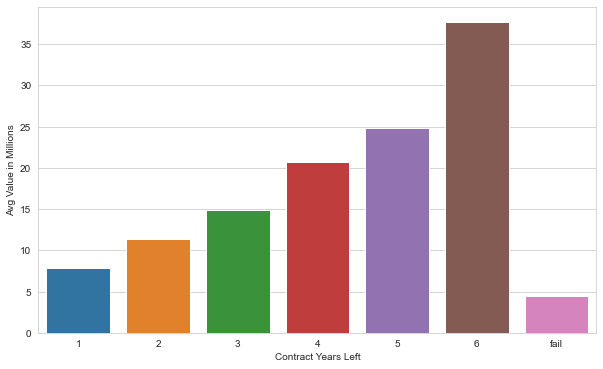

In [16]:
#Creating new df where sample size of contract years left is <= 5 (otherwise it's leading to a skew)
counts = df_15['Contract Years Left'].value_counts()
tempdf = df_15[~df_15['Contract Years Left'].isin(counts[counts < 5].index)]

#New df with average values per age
tempdf = tempdf.groupby('Contract Years Left')['Value'].mean()

#New df for graph
tempdf = tempdf.mul(0.000001).rename('Avg Value in Millions').reset_index() #to get value in millions

#Graph plotting
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='Contract Years Left', y='Avg Value in Millions', data=tempdf)

<AxesSubplot:xlabel='Nation', ylabel='Avg Value in Millions'>

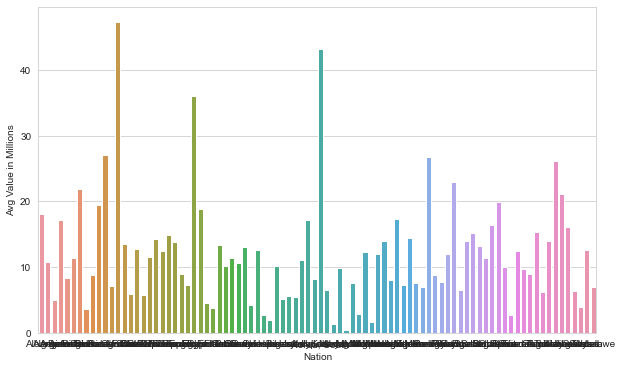

In [18]:
#Correlation between Nation and value

#New df with average values per nation
tempdf = df_15.groupby('Nation')['Value'].mean()

#New df for graph
tempdf = tempdf.mul(0.000001).rename('Avg Value in Millions').reset_index() #to get value in millions

#Graph plotting
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='Nation', y='Avg Value in Millions', data=tempdf)

<ipython-input-19-8748ea74b681>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attack['Cuts'] = pd.cut(df_attack['(G+A)/90 (20/21)'], bins, labels=group_names)


Text(0.5, 0, 'Goals + Assists per 90 mins (Attackers)')

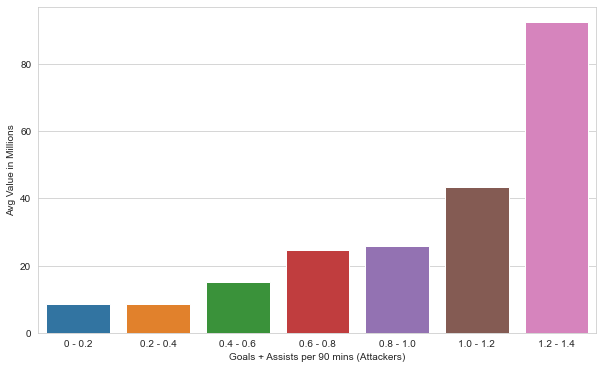

In [19]:
#Correlation between goals+assist/90mins and transfer value - for attackers

df_attack = df_15[df_15['Position'] == 'attack'] #new df with only attackers ()

#Cutting goals+assist/90mins into buckets:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4]
group_names = ['0 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1.0', '1.0 - 1.2', '1.2 - 1.4']
df_attack['Cuts'] = pd.cut(df_attack['(G+A)/90 (20/21)'], bins, labels=group_names)

#New df with average values per goals+assist/90mins
tempdf = df_attack.groupby('Cuts')['Value'].mean()
tempdf = tempdf.mul(0.000001).rename('Avg Value in Millions').reset_index() #to get value in millions

#Graph plotting
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x='Cuts', y='Avg Value in Millions', data=tempdf)
plt.xlabel("Goals + Assists per 90 mins (Attackers)")

<ipython-input-20-4747440ec4a8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_midfield['Cuts'] = pd.cut(df_midfield['(G+A)/90 (20/21)'], bins, labels=group_names)


Text(0.5, 0, 'Goals + Assists per 90 mins (Midfielders)')

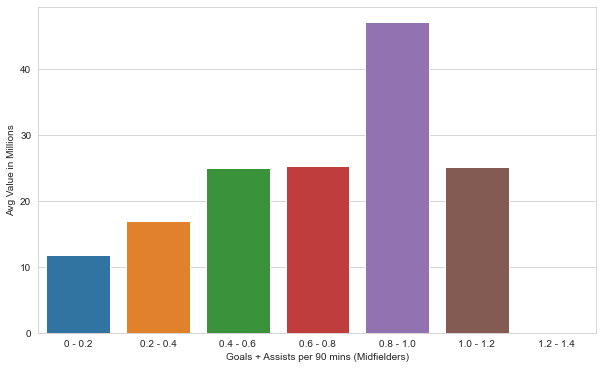

In [20]:
#Correlation between goals+assist/90mins and value - for midfielders

df_midfield = df_15[df_15['Position'] == 'midfield'] #new df with only midfielders

#Cutting goals+assist/90mins into buckets:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4]
group_names = ['0 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1.0', '1.0 - 1.2', '1.2 - 1.4']
df_midfield['Cuts'] = pd.cut(df_midfield['(G+A)/90 (20/21)'], bins, labels=group_names)

#New df with average values per goals+assist/90mins
tempdf = df_midfield.groupby('Cuts')['Value'].mean()
tempdf = tempdf.mul(0.000001).rename('Avg Value in Millions').reset_index() #to get value in millions

#Graph plotting
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

sns.barplot(x='Cuts', y='Avg Value in Millions', data=tempdf)

plt.xlabel("Goals + Assists per 90 mins (Midfielders)")

In [21]:
df_midfield['Cuts'].value_counts()

0 - 0.2      224
0.2 - 0.4    123
0.4 - 0.6     42
0.6 - 0.8     14
0.8 - 1.0      5
1.0 - 1.2      1
1.2 - 1.4      0
Name: Cuts, dtype: int64

<ipython-input-22-c4ef442cea44>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Defender['Cuts'] = pd.cut(df_Defender['(G+A)/90 (20/21)'], bins, labels=group_names)


Text(0.5, 0, 'Goals + Assists per 90 mins (Defenders)')

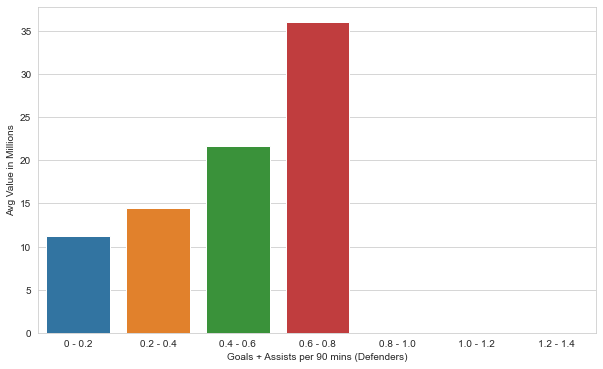

In [22]:
#Co-relation between goals+assist/90mins and value - for defenders

df_Defender = df_15[df_15['Position'] == 'Defender'] #new df with only midfielders

#Cutting goals+assist/90mins into buckets:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4]
group_names = ['0 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1.0', '1.0 - 1.2', '1.2 - 1.4']
df_Defender['Cuts'] = pd.cut(df_Defender['(G+A)/90 (20/21)'], bins, labels=group_names)

#New df with average values per goals+assist/90mins
tempdf = df_Defender.groupby('Cuts')['Value'].mean()
tempdf = tempdf.mul(0.000001).rename('Avg Value in Millions').reset_index() #to get value in millions

#Graph plotting
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

sns.barplot(x='Cuts', y='Avg Value in Millions', data=tempdf)

plt.xlabel("Goals + Assists per 90 mins (Defenders)")

In [23]:
#Checking which features are strongly correlated with transfer price
x = pd.DataFrame(df_15.corr()['Value'])
x

,Value
Age,-0.264730
Value,1.000000
MP (20/21),0.238468
Starts (20/21),0.261085
Min (20/21),0.265660
...,...
Own Goals (20/21),-0.008410
Total Loose Balls Recovered (20/21),0.151138
Aerial Duel Won (20/21),0.035300
Aerial Duel Lost (20/21),0.063955


In [24]:
#Sorting by strongest correlation
x = x.sort_values('Value', ascending=False) 
x = x[x['Value']>0.4]
x

,Value
Value,1.000000
Goal Creating Actions (20/21),0.486852
Number of Times Player was Pass Target (20/21),0.484844
Passes Leading to Goals (20/21),0.478690
Total Carries in Forward Direction (20/21),0.478071
Non-penalty xG+ xA (20/21),0.475322
Passes Leading to Shot Attempt (20/21),0.467209
Touches in Attacking Penalty Box (20/21),0.460145
Shot-Creating Actions (20/21),0.450528
Carries into Attacking Penalty Box (20/21),0.448627


<AxesSubplot:>

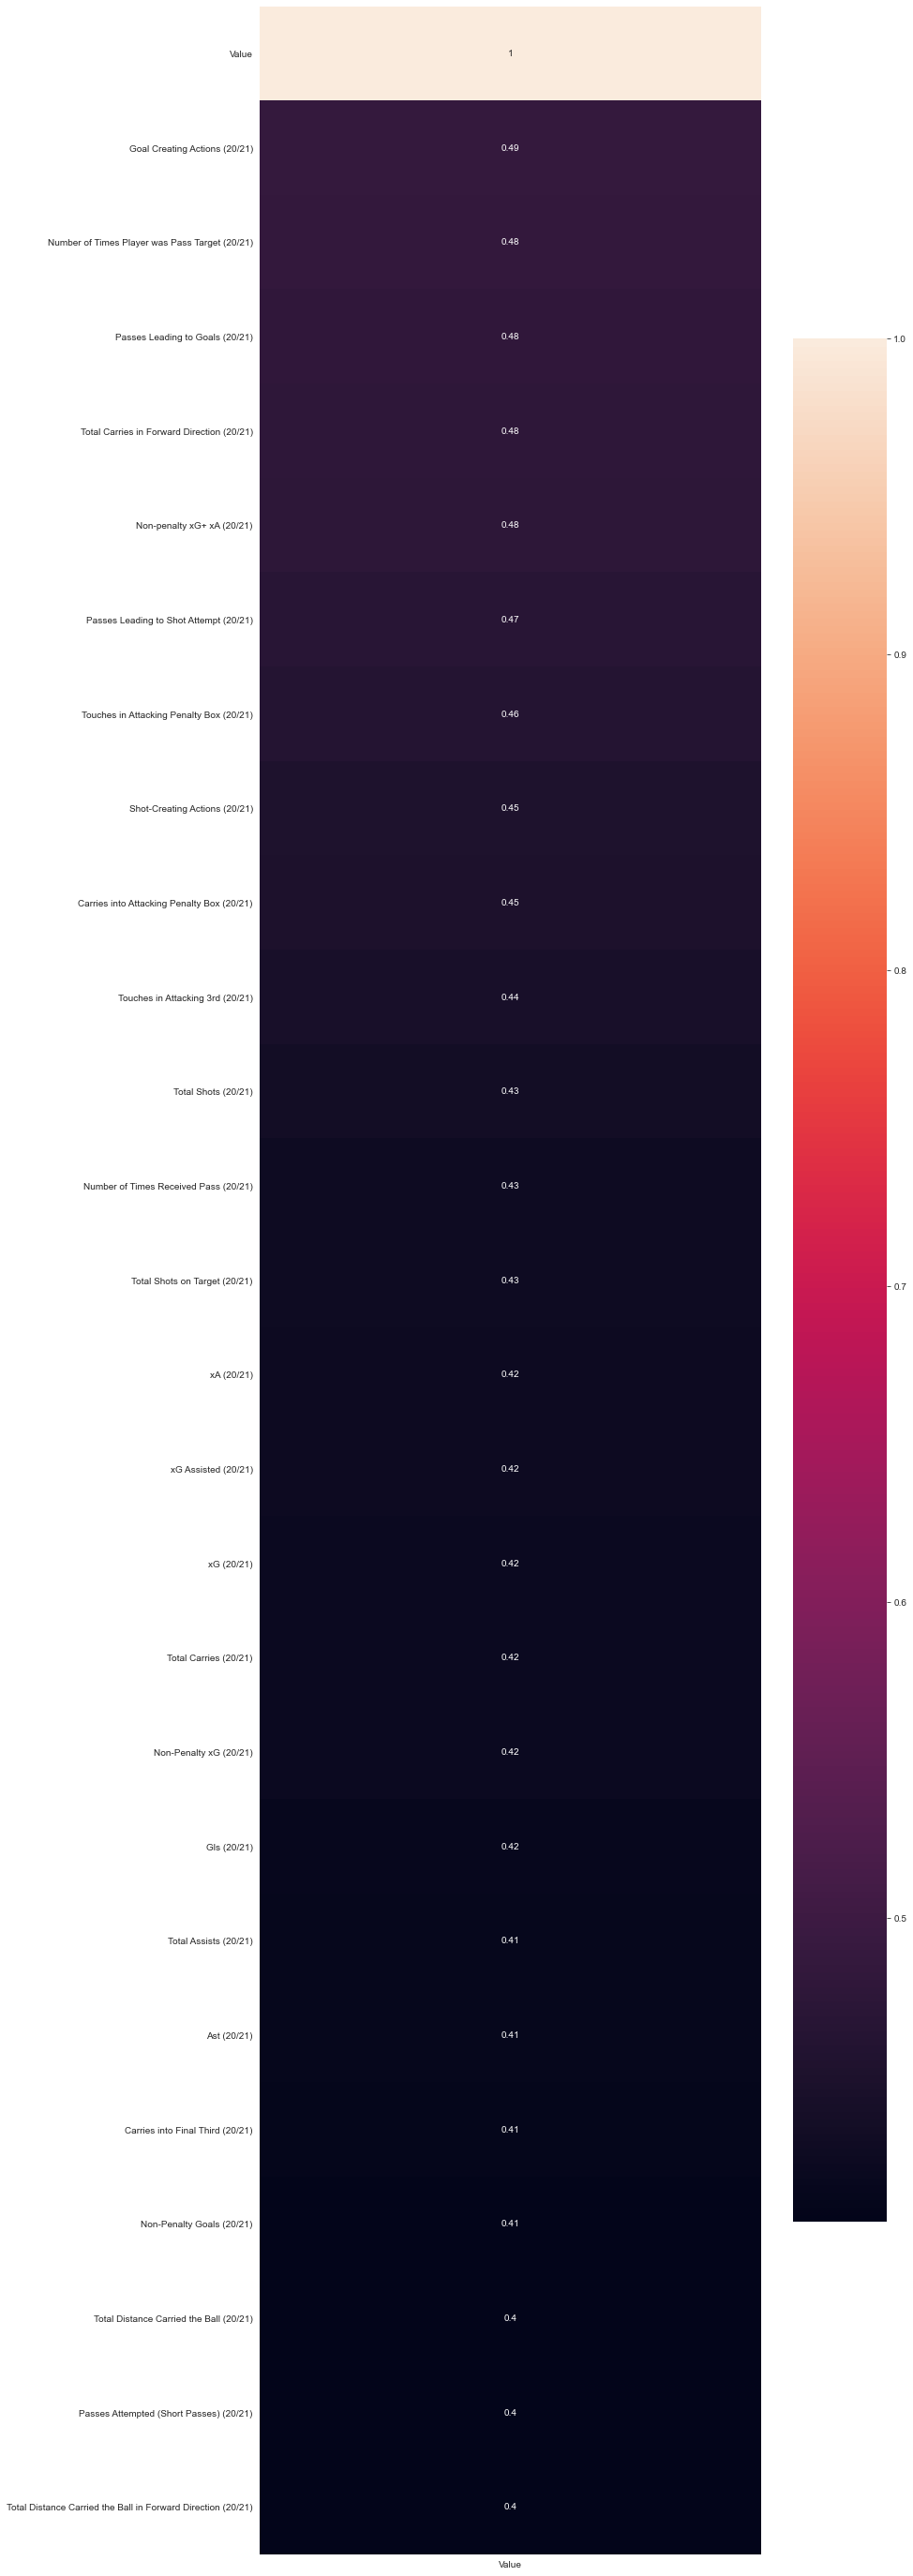

In [26]:
#Graph - features with strongest correlation with transfer price
plt.figure(figsize=(12,50))
sns.heatmap(data=x.sort_values('Value', ascending=False), annot=True)

In [27]:
df_15.head()

,Player,Club,Age,Position,Nation,Value,Contract Years Left,League,Squad (20/21),MP (20/21),...,Offsides (20/21),Crosses (20/21),Interceptions (20/21),Penalty Kicks Won (20/21),Penalties Conceded (20/21),Own Goals (20/21),Total Loose Balls Recovered (20/21),Aerial Duel Won (20/21),Aerial Duel Lost (20/21),% Aerial Duels Won (20/21)
0,Kylian Mbappe,Paris Saint-Germain,22,attack,France,144000000,1,Ligue 1,Paris S-G,31.0,...,17.0,68.0,7.0,4.0,0.0,0.0,109.0,7.0,8.0,46.7
1,Erling Haaland,Borussia Dortmund,21,attack,Norway,117000000,3,Bundesliga,Dortmund,28.0,...,15.0,13.0,5.0,0.0,0.0,0.0,96.0,37.0,40.0,48.1
2,Harry Kane,Tottenham Hotspur,28,attack,England,108000000,3,Premier League,Tottenham,35.0,...,12.0,37.0,15.0,2.0,0.0,0.0,155.0,90.0,129.0,41.1
3,Jadon Sancho,Manchester United,21,attack,England,90000000,5,Premier League,Dortmund,26.0,...,9.0,52.0,14.0,0.0,0.0,0.0,154.0,5.0,22.0,18.5
4,Mohamed Salah,Liverpool FC,29,attack,Egypt,90000000,2,Premier League,Liverpool,37.0,...,13.0,47.0,9.0,2.0,0.0,0.0,191.0,21.0,52.0,28.8


In [28]:
df_15.columns[df_15.isnull().sum() > 0].tolist() #to get cols with missing values

['Shots on Target% (20/21)',
 'Goals/Shots (20/21)',
 'Goals/Shots on Target (20/21)',
 'Avg Shot Distance (yds) (20/21)',
 'Non-Penalty xG/Shots (20/21)',
 'Dribble Success % (20/21)',
 'Pass Completion % (Long Passes) (20/21)',
 '% of Dribblers Tackled (20/21)',
 'Successful Pressure % (20/21)',
 '% Aerial Duels Won (20/21)']

In [29]:
#Dropping un-necessary cols

df_ML = df_15.drop(['Shots on Target% (20/21)',
 'Goals/Shots (20/21)',
 'Goals/Shots on Target (20/21)',
 'Avg Shot Distance (yds) (20/21)',
 'Non-Penalty xG/Shots (20/21)',
 'Dribble Success % (20/21)',
 'Pass Completion % (Long Passes) (20/21)',
 '% of Dribblers Tackled (20/21)',
 'Successful Pressure % (20/21)',
 '% Aerial Duels Won (20/21)',
 'Player',
 'Nation',
 'Squad (20/21)'], axis=1)

df_ML['Club'].unique() #checking the number of clubs in the dataset

array(['Paris Saint-Germain', 'Borussia Dortmund', 'Tottenham Hotspur',
       'Manchester United', 'Liverpool FC', 'Manchester City',
       'Chelsea FC', 'Bayern Munich', 'FC Barcelona',
       'Atlético de Madrid', 'Inter Milan', 'Juventus FC',
       'Real Sociedad', 'SS Lazio', 'Real Madrid', 'West Ham United',
       'Arsenal FC', 'Sevilla FC', 'Leicester City', 'AC Milan',
       'Everton FC', 'RB Leipzig', 'Villarreal CF', 'SSC Napoli',
       'Bayer 04 Leverkusen', 'Wolverhampton Wanderers', 'Crystal Palace',
       'Olympique Lyon', 'AS Roma', 'Valencia CF', 'ACF Fiorentina',
       'Leeds United', 'Olympique Marseille', 'Aston Villa',
       'US Sassuolo', 'Borussia Mönchengladbach', 'Eintracht Frankfurt',
       'LOSC Lille', 'Atalanta BC', 'AS Monaco', 'Torino FC',
       'Southampton FC', 'VfL Wolfsburg', 'OGC Nice', 'Newcastle',
       'TSG 1899 Hoffenheim', 'Stade Rennais FC', 'Burnley FC',
       'Brighton &amp; Hove Albion', 'VfB Stuttgart',
       'Real Betis Balompi

In [31]:
#Sorting clubs by those with highest mean transfer price - will be used to categorize into 4 tiers
x = df_ML.groupby('Club')['Value'].mean().sort_values(ascending=False)
y = pd.DataFrame(x)
z = y.reset_index()        
z['Club'].to_list()

['Manchester City',
 'Liverpool FC',
 'Bayern Munich',
 'Manchester United',
 'Paris Saint-Germain',
 'Chelsea FC',
 'Atlético de Madrid',
 'FC Barcelona',
 'Tottenham Hotspur',
 'Real Madrid',
 'Juventus FC',
 'Borussia Dortmund',
 'Inter Milan',
 'SSC Napoli',
 'RB Leipzig',
 'Arsenal FC',
 'Leicester City',
 'Everton FC',
 'Wolverhampton Wanderers',
 'Aston Villa',
 'AC Milan',
 'AS Roma',
 'Sevilla FC',
 'Real Sociedad',
 'West Ham United',
 'Atalanta BC',
 'Borussia Mönchengladbach',
 'AS Monaco',
 'Bayer 04 Leverkusen',
 'LOSC Lille',
 'Olympique Lyon',
 'Leeds United',
 'Villarreal CF',
 'SS Lazio',
 'VfL Wolfsburg',
 'Olympique Marseille',
 'ACF Fiorentina',
 'Valencia CF',
 'Brighton &amp; Hove Albion',
 'Southampton FC',
 'OGC Nice',
 'Crystal Palace',
 'Stade Rennais FC',
 'Newcastle',
 'TSG 1899 Hoffenheim',
 'Eintracht Frankfurt',
 'US Sassuolo',
 'Athletic Bilbao',
 'Real Betis Balompié',
 'Fulham FC',
 'VfB Stuttgart',
 'Celta de Vigo',
 'Getafe CF',
 'Bologna FC 1909',


In [32]:
#Replacing club name with tier

Tier1 = ['Manchester City', 'Liverpool FC', 'Bayern Munich', 'Manchester United', 'Paris Saint-Germain', 'Chelsea FC',
         'FC Barcelona', 'Real Madrid']
Tier2 = ['Atlético de Madrid', 'Tottenham Hotspur', 'Juventus FC', 'Borussia Dortmund', 'Inter Milan', 'SSC Napoli', 
         'RB Leipzig', 'Arsenal FC', 'Leicester City', 'Everton FC', 'Wolverhampton Wanderers', 'Aston Villa', 
         'AC Milan', 'AS Roma','Sevilla FC']
Tier3 = ['Real Sociedad','West Ham United','Atalanta BC','Borussia Mönchengladbach', 'AS Monaco','Bayer 04 Leverkusen',
         'LOSC Lille','Olympique Lyon','Leeds United','Villarreal CF','SS Lazio','VfL Wolfsburg','Olympique Marseille',
         'ACF Fiorentina','Valencia CF','Brighton &amp; Hove Albion','Southampton FC','OGC Nice']
Tier4 = ['Crystal Palace', 'Stade Rennais FC','Newcastle','TSG 1899 Hoffenheim','Eintracht Frankfurt','US Sassuolo',
         'Athletic Bilbao','Real Betis Balompié','Fulham FC','VfB Stuttgart','Celta de Vigo','Getafe CF','Bologna FC 1909',
         'Burnley FC','Cagliari','Torino FC','SC Freiburg','Hertha BSC','Montpellier HSC','UC Sampdoria','RC Lens',
         'Hellas Verona','Stade Reims','RC Strasbourg Alsace','1.FSV Mainz 05','West Bromwich Albion','AS Saint-Étienne',
         'Sheffield United','Levante UD','FC Augsburg','Udinese Calcio','FC Metz','Granada CF','1. FC Köln','Stade Brestois 29',
         'FC Nantes','Deportivo Alavés','FC Girondins Bordeaux','SV Werder Bremen','CA Osasuna','Spezia Calcio',
         '1.FC Union Berlin','SCO Angers','Parma Calcio 1913','Genoa CFC','Nîmes Olympique','FC Lorient','FC Schalke 04',
         'Real Valladolid CF','Arminia Bielefeld','Cádiz CF','Elche CF','SD Eibar','Dijon FCO','Benevento Calcio',
         'FC Crotone','SD Huesca']

df_ML['Club'] = df_ML['Club'].replace(Tier1, 1)
df_ML['Club'] = df_ML['Club'].replace(Tier2, 2)
df_ML['Club'] = df_ML['Club'].replace(Tier3, 3)
df_ML['Club'] = df_ML['Club'].replace(Tier4, 4)

df_ML

,Club,Age,Position,Value,Contract Years Left,League,MP (20/21),Starts (20/21),Min (20/21),Total Mins/90 (20/21),...,Fouls Drawn (20/21),Offsides (20/21),Crosses (20/21),Interceptions (20/21),Penalty Kicks Won (20/21),Penalties Conceded (20/21),Own Goals (20/21),Total Loose Balls Recovered (20/21),Aerial Duel Won (20/21),Aerial Duel Lost (20/21)
0,1,22,attack,144000000,1,Ligue 1,31.0,27.0,2380.0,26.4,...,38.0,17.0,68.0,7.0,4.0,0.0,0.0,109.0,7.0,8.0
1,2,21,attack,117000000,3,Bundesliga,28.0,27.0,2407.0,26.7,...,22.0,15.0,13.0,5.0,0.0,0.0,0.0,96.0,37.0,40.0
2,2,28,attack,108000000,3,Premier League,35.0,35.0,3082.0,34.2,...,60.0,12.0,37.0,15.0,2.0,0.0,0.0,155.0,90.0,129.0
3,1,21,attack,90000000,5,Premier League,26.0,24.0,2062.0,22.9,...,22.0,9.0,52.0,14.0,0.0,0.0,0.0,154.0,5.0,22.0
4,1,29,attack,90000000,2,Premier League,37.0,34.0,3078.0,34.2,...,22.0,13.0,47.0,9.0,2.0,0.0,0.0,191.0,21.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,4,31,Defender,360000,2,La Liga,19.0,12.0,1191.0,13.2,...,9.0,0.0,17.0,21.0,0.0,0.0,0.0,119.0,24.0,11.0
2042,4,38,Goalkeeper,315000,2,Ligue 1,24.0,24.0,2160.0,24.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,100.0,0.0,0.0
2049,4,35,midfield,270000,1,Ligue 1,30.0,10.0,1130.0,12.6,...,24.0,0.0,32.0,8.0,0.0,0.0,0.0,72.0,3.0,17.0
2058,4,36,midfield,270000,1,La Liga,32.0,27.0,2183.0,24.3,...,21.0,3.0,26.0,20.0,0.0,0.0,0.0,205.0,14.0,28.0


In [33]:
#Mapping string values to numerical

df_ML['Position'] = df_ML['Position'].map({'attack': 1, 'midfield': 2, 'Defender': 3, 'Goalkeeper': 4})
df_ML['League'] = df_ML['League'].map({'Ligue 1': 1, 'Bundesliga': 2, 'Premier League': 3, 'La Liga': 4, 'Serie A': 5})


In [34]:
df_ML = df_ML[df_ML['Contract Years Left'] != 'fail'] #removing 30 rows which had 'fail' as a value
df_ML['Contract Years Left'] = df_ML['Contract Years Left'].astype(float) #converting object to float
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482 entries, 0 to 2060
Columns: 130 entries, Club to Aerial Duel Lost (20/21)
dtypes: float64(125), int64(5)
memory usage: 1.5 MB


<ipython-input-34-ea8f2b91902d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ML['Contract Years Left'] = df_ML['Contract Years Left'].astype(float) #converting object to float


In [35]:
df_ML.columns.to_list()

['Club',
 'Age',
 'Position',
 'Value',
 'Contract Years Left',
 'League',
 'MP (20/21)',
 'Starts (20/21)',
 'Min (20/21)',
 'Total Mins/90 (20/21)',
 'Gls (20/21)',
 'Ast (20/21)',
 'Non-Penalty Goals (20/21)',
 'Penalties Scored (20/21)',
 'Penalties Attempted (20/21)',
 'Yellow Cards (20/21)',
 'Red Cards (20/21)',
 'Gls/90 (20/21)',
 'Ast/90 (20/21)',
 '(G+A)/90 (20/21)',
 'Non-Penalty Goals/90 (20/21)',
 '(Gls+Ast-Scored Penalties)/90 (20/21)',
 'xG (20/21)',
 'Non-Penalty xG (20/21)',
 'xA (20/21)',
 'Non-penalty xG+ xA (20/21)',
 'xG/90 (20/21)',
 'xA/90 (20/21)',
 '(xG+xA)/90 (20/21)',
 'Non-Penalty xG/90 (20/21)',
 '(Non-Penalty xG+xA)/90 (20/21)',
 'Total Shots (20/21)',
 'Total Shots on Target (20/21)',
 'Shots/90 (20/21)',
 'Shots on Target/90 (20/21)',
 'Freekick Shots (20/21)',
 'Goals Scored minus xG (20/21)',
 'Non-Penalty Goals Scored minus Non-Penalty xG (20/21)',
 'Shot-Creating Actions (20/21)',
 'Shot-Creating Actions/90 (20/21)',
 'Passes Leading to Shot Attempt 

In [36]:
df_ML

,Club,Age,Position,Value,Contract Years Left,League,MP (20/21),Starts (20/21),Min (20/21),Total Mins/90 (20/21),...,Fouls Drawn (20/21),Offsides (20/21),Crosses (20/21),Interceptions (20/21),Penalty Kicks Won (20/21),Penalties Conceded (20/21),Own Goals (20/21),Total Loose Balls Recovered (20/21),Aerial Duel Won (20/21),Aerial Duel Lost (20/21)
0,1,22,1,144000000,1.0,1,31.0,27.0,2380.0,26.4,...,38.0,17.0,68.0,7.0,4.0,0.0,0.0,109.0,7.0,8.0
1,2,21,1,117000000,3.0,2,28.0,27.0,2407.0,26.7,...,22.0,15.0,13.0,5.0,0.0,0.0,0.0,96.0,37.0,40.0
2,2,28,1,108000000,3.0,3,35.0,35.0,3082.0,34.2,...,60.0,12.0,37.0,15.0,2.0,0.0,0.0,155.0,90.0,129.0
3,1,21,1,90000000,5.0,3,26.0,24.0,2062.0,22.9,...,22.0,9.0,52.0,14.0,0.0,0.0,0.0,154.0,5.0,22.0
4,1,29,1,90000000,2.0,3,37.0,34.0,3078.0,34.2,...,22.0,13.0,47.0,9.0,2.0,0.0,0.0,191.0,21.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,4,31,3,360000,2.0,4,19.0,12.0,1191.0,13.2,...,9.0,0.0,17.0,21.0,0.0,0.0,0.0,119.0,24.0,11.0
2042,4,38,4,315000,2.0,1,24.0,24.0,2160.0,24.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,100.0,0.0,0.0
2049,4,35,2,270000,1.0,1,30.0,10.0,1130.0,12.6,...,24.0,0.0,32.0,8.0,0.0,0.0,0.0,72.0,3.0,17.0
2058,4,36,2,270000,1.0,4,32.0,27.0,2183.0,24.3,...,21.0,3.0,26.0,20.0,0.0,0.0,0.0,205.0,14.0,28.0


In [37]:
#MACHINE LEARNING MODEL

#Test-train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_ML.drop('Value',axis=1), 
                                                    df_ML['Value'], test_size=0.40, 
                                                    random_state=101)

In [38]:
##dummy dataset and normalize values and redo...also try reducing features

#Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train) #only fit training set, and NOT test set, to prevent leakage
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
#Model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [40]:
#Running the model
predictions = lm.predict(X_test)
predictions = np.sqrt(predictions**2) # to turn few negative values into positive

Text(0, 0.5, 'Predicted Value in Millions')

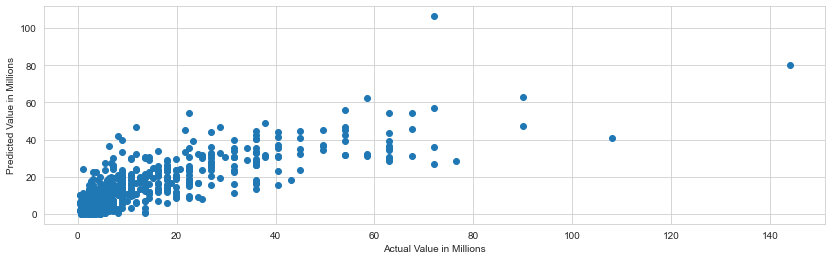

In [41]:
#Results - graph of predicted vs actual
plt.figure(figsize=(14,4))
plt.scatter(y_test*.000001,predictions*.000001)
plt.xlabel("Actual Value in Millions")
plt.ylabel("Predicted Value in Millions")

In [42]:
y_test

889      6750000
396       540000
92      43200000
1495     2250000
1211     4050000
          ...   
16      72000000
156     34200000
1143     4500000
450     16200000
110     40500000
Name: Value, Length: 593, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, '(Test - Prediction)')

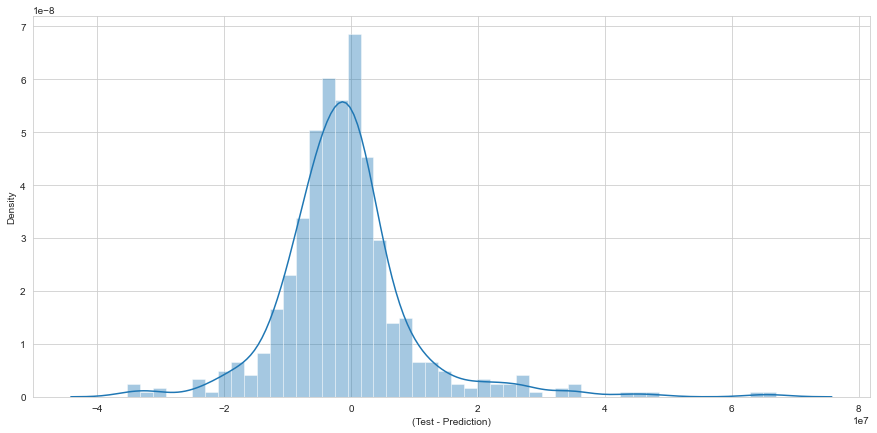

In [40]:
#Graph of value of Actual values MINUS Predicted 
plt.figure(figsize=(15,7))
sns.distplot(y_test-predictions) #distplot of residuals
plt.xlabel("(Test - Prediction)")

In [41]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,predictions)

6965645.166947723

In [42]:
metrics.mean_squared_error(y_test,predictions)

112532171011619.4

In [43]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

10608118.165424978

In [44]:
metrics.explained_variance_score(y_test,predictions)

0.621543554046887